<h1><center>MINORITIES' ENGAGEMENT FOR DIGITAL LEARNING</center></h1>

### INTRODUCTION

Nelson Mandela believed education was the most powerful weapon to change the world. But not every student has equal opportunities to learn. Effective policies and plans need to be enacted in order to make education more equitable—and perhaps exploratory data analysis carried out will give an insight as to possible solutions that could be implemented.

Current research shows educational outcomes are far from equitable. The imbalance was amplified by the COVID-19 pandemic. There is an urgent need to better understand and measure the scope and impact of the pandemic on these inequities.

Education technology company LearnPlatform was founded in 2014 with a mission to expand equitable access to education technology for all students and teachers. LearnPlatform’s comprehensive edtech effectiveness system is used by districts and states to continuously improve the safety, equity, and effectiveness of their educational technology. LearnPlatform does so by generating an evidence basis for what is working and enacting it to benefit students, teachers, and budgets.

This project would hopefully help uncover trends in digital learning. This would be accomplished with data analysis about how engagement with digital learning relates to factors like district demographics, broadband access, and state/national level policies and events.

This notebook will inform policies and practices that close the digital divide. With a better understanding of digital learning trends, this notebook may help reverse the long-term learning loss among America’s most vulnerable, making education more equitable.

### Problem Statement
The COVID-19 Pandemic has disrupted learning for more than 56 million students in the United States. In the Spring of 2020, most states and local governments across the U.S. closed educational institutions to stop the spread of the virus. In response, schools and teachers have attempted to reach students remotely through distance learning tools and digital platforms. Until today, concerns of the increasing digital divide and long-term learning loss among America’s most vulnerable learners continue to grow.

### AIM
- Explore the state of digital learning in 2020 
- Examine how the engagement of digital learning relates to factors such as district demographics, broadband access, and state/national level policies and events.

### DATA DESCRIPTION
There are four sets of files used for this project. The engagement, product, and district data can be found at this link: https://www.kaggle.com/c/learnplatform-covid19-impact-on-digital-learning/data, while the COVID-19 US state policy database 3_29_2021 is gotten from a public data source at this link: https://www.openicpsr.org/openicpsr/project/119446/version/V75/view;jsessionid=851ECB80E6CB42252D396C29564184DC.

The engagement data are based on LearnPlatform’s Student Chrome Extension. The extension collects page load events of over 10,000 education technology products in our product library, including websites, apps, web apps, software programs, extensions, ebooks, hardwares, and services used in educational institutions. The engagement data have been aggregated at school district level, and each file represents data from one school district. 

The product file includes information about the characteristics of the top 372 products with most users in 2020. 

The district file includes information about the characteristics of school districts, including data from National Center for Education Statistics (NCES), The Federal Communications Commission (FCC), and Edunomics Lab. 

The COVID-19 US state policy database 3_29_2021 data includes a wide variety of information, but only a select few were choosen to aid in the project. This data only tracks dates of policy implementation, rather than when the policies were passed and it only has records of orders or directives as opposed to guidance or recommendations.

### DATA DEFINITION
1. Engagement Data
    - time: "YYYY-MM-DD".
    - lp_id: the unique identifier of the product.
    - pct_access: percentage of students in the district that have at least one page-load event of a given product and on a given day.
    - engagement_index: total page-load events per one thousand students of a given product and on a given day.


2. Product Data
    - district_id: the unique identifier of the school district.
    - state: the state where the district resides in. 
    - locale: NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural. 
    - pct_black/hispanic: percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data.
    - pct_free/reduced: percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data.
    - countyconnectionsratio: ratio (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on the county level data from FCC From 477 (December 2018 version).
    - pptotalraw: per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district.


3. District Data
    - LP ID: the unique identifier of the product.
    - URL: web link to the specific product.
    - Product Name: name of the specific product.
    - Provider/Company Name: name of the product provider.
    - Sector(s): Sector of education where the product is used.
    - Primary Essential Function: the basic function of the product. There are two layers of labels here. Products are first labeled as one of these three categories: LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District Operations. Each of these categories have multiple sub-categories with which the products were labeled.


4. The COVID-19 US state policy database 3_29_2021 data
    - State
    - State of Emergency issued.
    - State of Emergency expired.
    - Date closed K-12 public schools.
    - Closed day cares.
    - Reopen day cares.
    - Closed other non-essential businesses.
    - Closed businesses overnight: curfew for resturants and bars that sell alcoholic beverages.
    - Began to reopen businesses.

### LIBRARIES

In [36]:
import os
import re
import glob 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 50)

### IMPORT AND READ DATA

In [130]:
path = r'C:\Users\efere\Downloads\Dataset\engagement_data'
engagement_files = glob.glob(os.path.join(path, "*.csv"))
my_list = []
for i in engagement_files:
    my_file = pd.read_csv(i)
    filename = os.path.splitext(i)
    my_file['district_id'] = os.path.basename(filename[0])
    my_list.append(my_file)
    engagement_data = pd.concat(my_list)

engagement_data

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,93690.0,0.00,NaN,1000
1,2020-01-01,17941.0,0.03,0.90,1000
2,2020-01-01,65358.0,0.03,1.20,1000
3,2020-01-01,98265.0,0.57,37.79,1000
4,2020-01-01,59257.0,0.00,NaN,1000
...,...,...,...,...,...
98445,2020-12-31,56028.0,0.02,0.20,9927
98446,2020-12-31,14124.0,0.02,0.99,9927
98447,2020-12-31,98001.0,0.00,NaN,9927
98448,2020-12-31,13496.0,0.12,6.51,9927


In [131]:
districts_info = pd.read_csv(r'C:\Users\efere\Downloads\Dataset\districts_info.csv')
products_info = pd.read_csv(r'C:\Users\efere\Downloads\Dataset\products_info.csv')
US_policy_info = pd.read_excel(r'C:\Users\efere\Downloads\Dataset\COVID-19 US state policy database 3_29_2021.xlsx', 
                               skiprows=[0])

In [132]:
engagement_data.head()

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,93690.0,0.00,NaN,1000
1,2020-01-01,17941.0,0.03,0.90,1000
2,2020-01-01,65358.0,0.03,1.20,1000
3,2020-01-01,98265.0,0.57,37.79,1000
4,2020-01-01,59257.0,0.00,NaN,1000


In [133]:
districts_info.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
products_info.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [135]:
US_policy_info = US_policy_info[['State','State of emergency issued', 'State of emergency expired', 'Date closed K-12 public schools', 
                               'Closed day cares', 'Reopen day cares', 'Closed other non-essential businesses', 
                                'Closed businesses overnight', 'Began to reopen businesses']]

In [136]:
US_policy_info = US_policy_info.drop(labels=[0,1,2], axis=0)
US_policy_info.head()

,State,State of emergency issued,State of emergency expired,Date closed K-12 public schools,Closed day cares,Reopen day cares,Closed other non-essential businesses,Closed businesses overnight,Began to reopen businesses
0,category,state_of_emergency,state_of_emergency,physical_distance_closure,physical_distance_closure,Reopening,physical_distance_closure,physical_distance_closure,reopening
1,type,start,end,start,start,end,start,start,end
2,unit,date,date,date,date,date,date,end,date
3,Alabama,2020-03-13 00:00:00,0,2020-03-20 00:00:00,2020-03-20 00:00:00,2020-05-23 00:00:00,2020-03-28 00:00:00,0,2020-04-30 00:00:00
4,Alaska,2020-03-11 00:00:00,2021-02-14 00:00:00,2020-03-16 00:00:00,0,0,2020-03-24 00:00:00,0,2020-04-24 00:00:00


### DATA CLEANING

#### Districts_info Data

In [139]:
districts_info.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
districts_info = districts_info[districts_info['state'].notna()]

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["


In [142]:
blacks = []
hispanics = []
for i in districts_info['pct_black/hispanic']:
    blacks.append(float(i.replace("[","").replace(']','').split(", ")[0]))
    hispanics.append(float(i.replace("[","").replace(']','').split(", ")[1]))
districts_info['blacks'] = blacks
districts_info['hispanics'] = hispanics

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,blacks,hispanics
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",0.0,0.2
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000[",0.0,0.2
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000[",0.0,0.2
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",0.0,0.2
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000[",0.2,0.4


#### Products_info Data


In [144]:
products_info.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [145]:
products_info.rename(columns={'LP ID':'lp_id'}, inplace=True)

#### US_policy_info Data

In [148]:
date_columns=US_policy_info[['State of emergency issued', 'State of emergency expired', 'Date closed K-12 public schools', 
                               'Closed day cares', 'Reopen day cares', 'Closed other non-essential businesses', 
                                'Closed businesses overnight', 'Began to reopen businesses']]
date_columns=date_columns.apply(lambda x: pd.to_datetime(x,errors = 'coerce', format = '%Y-%m-%d'))

In [161]:
US_policy_info.rename(columns={'State':'state'}, inplace=True)
state_columns=US_policy_info['state']

In [162]:
US_policy_info = pd.concat([state_columns, date_columns],1)

#### ANALYSIS AND DISCUSSION

**DISTRICTS**

In [181]:
df = districts_info
df.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,blacks,hispanics
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",0.0,0.2
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000[",0.0,0.2
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000[",0.0,0.2
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000[",0.0,0.2
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000[",0.2,0.4


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 232
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   district_id               176 non-null    int64  
 1   state                     176 non-null    object 
 2   locale                    176 non-null    object 
 3   pct_black/hispanic        176 non-null    object 
 4   pct_free/reduced          148 non-null    object 
 5   county_connections_ratio  162 non-null    object 
 6   pp_total_raw              118 non-null    object 
 7   blacks                    176 non-null    float64
 8   hispanics                 176 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 18.8+ KB


In [188]:
df['district_id'].nunique()

176

In [189]:
df['state'].nunique()

23

In [191]:
locale = df['locale'].value_counts().to_frame()
locale.rename(columns={'locale':'count'}, inplace=True)
locale.index.names = ['locale']
locale

,count
locale,
Suburb,104
Rural,33
City,29
Town,10


C:\Users\efere\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


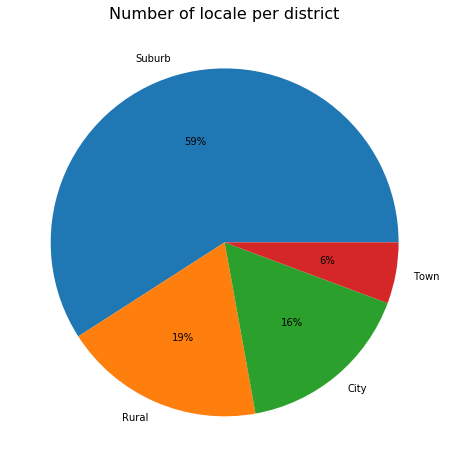

In [323]:
plt.figure(figsize=(10,8))
plt.pie(locale, labels=['Suburb', 'Rural', 'City', 'Town'], autopct='%.0f%%')
colors = sns.color_palette('pastel')[0:5]
plt.title('Number of locale per district',fontsize=16)
plt.show()

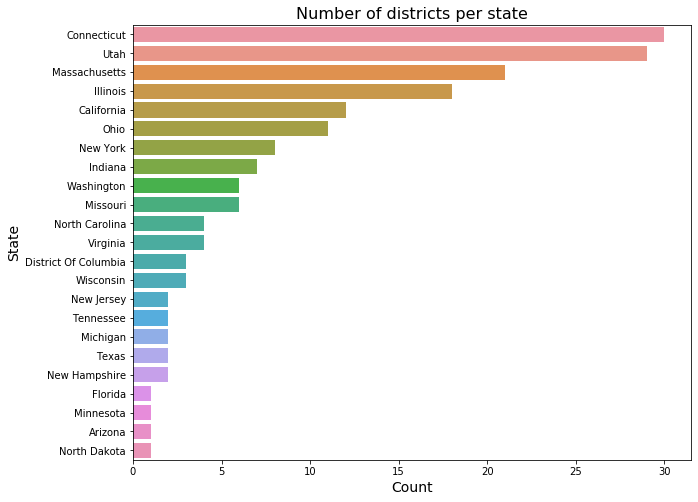

In [320]:
plt.figure(figsize=(10,8))
sns.countplot(y='state', data=df, order=df['state'].value_counts().index)
plt.xlabel('Count', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.title('Number of districts per state', fontsize=16)
plt.show()

In [284]:
#demographic
black=df[['state', 'locale', 'blacks']]
black = black[black['blacks']!=0]
black_state = black['state'].value_counts().to_frame()
black_state.rename(columns={'state':'count'}, inplace=True)
black_state.index.names=['state']
black_state.head()

,count
state,
Connecticut,9
Illinois,9
California,8
Utah,5
North Carolina,4


In [285]:
black_state.tail()

,count
state,
Florida,1
Minnesota,1
Virginia,1
Arizona,1
New York,1


In [287]:
black_locale = black['locale'].value_counts().to_frame()
black_locale.rename(columns={'locale':'count'}, inplace=True)
black_locale.index.names=['locale']
black_locale

,count
locale,
Suburb,34
City,23
Rural,2
Town,1


In [288]:
hispanics=df[['state', 'locale', 'hispanics']]
hispanics = hispanics[hispanics['hispanics']!=0]
hispanic_state = hispanics['state'].value_counts().to_frame()
hispanic_state.rename(columns={'state':'count'}, inplace=True)
hispanic_state.index.names=['state']
hispanic_state.head()

,count
state,
Connecticut,30
Utah,29
Massachusetts,21
Illinois,18
California,12


In [289]:
hispanic_state.tail()

,count
state,
New Hampshire,2
Florida,1
Minnesota,1
Arizona,1
North Dakota,1


In [290]:
hispanic_locale = hispanics['locale'].value_counts().to_frame()
hispanic_locale.rename(columns={'locale':'count'}, inplace=True)
hispanic_locale.index.names=['locale']
hispanic_locale

,count
locale,
Suburb,104
Rural,33
City,29
Town,10


**PRODUCTS**

In [298]:
df1=products_info
df1.head()

,lp_id,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [300]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   lp_id                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [334]:
pcn = df1['Provider/Company Name'].value_counts().head().to_frame()
pcn.rename(columns={'Provider/Company Name':'count'}, inplace=True)
pcn.index.names=['Provider/Company Name']
pcn

,count
Provider/Company Name,
Google LLC,30
Microsoft,6
Houghton Mifflin Harcourt,6
Learning A-Z,4
IXL Learning,4


In [299]:
df1['lp_id'].nunique()

372

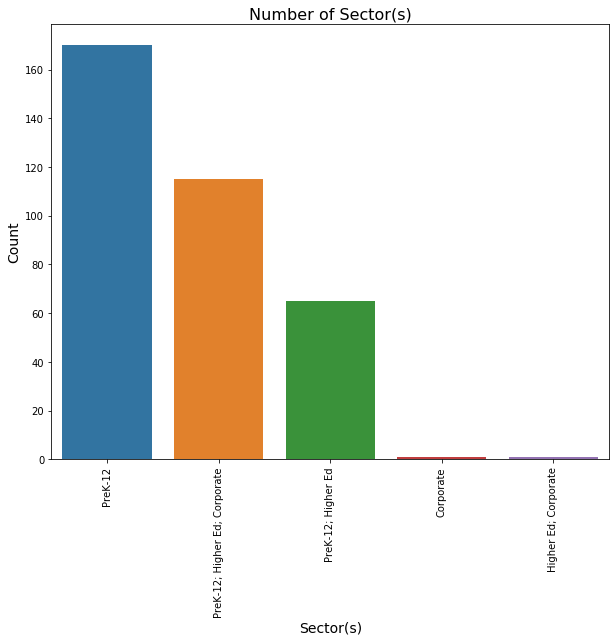

In [309]:
plt.figure(figsize=(10,8))
sns.countplot(x='Sector(s)', data=df1, order=df1['Sector(s)'].value_counts().index)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Sector(s)', fontsize=14)
plt.xticks(rotation=90)
plt.title('Number of Sector(s)', fontsize=16)
plt.show()

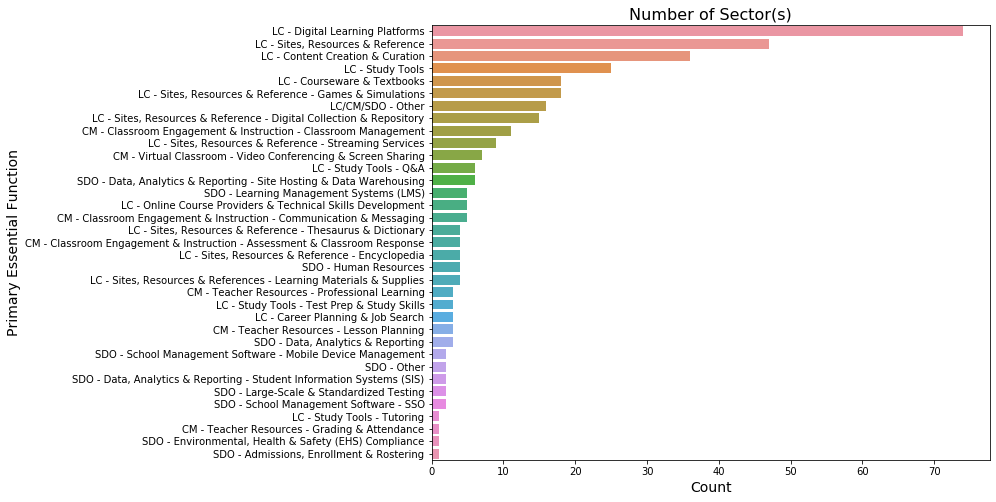

In [313]:
plt.figure(figsize=(10,8))
sns.countplot(y='Primary Essential Function', data=df1, order=df1['Primary Essential Function'].value_counts().index)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Primary Essential Function', fontsize=14)
plt.title('Number of Sector(s)', fontsize=16)
plt.show()

**DISTRICTS AND ENGAGEMENT**

In [179]:
engagement_data["district_id"] = engagement_data["district_id"].astype(str).astype(int)
de = pd.merge(districts_info, engagement_data, left_on='district_id', right_on='district_id')

In [180]:
de.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,blacks,hispanics,time,lp_id,pct_access,engagement_index
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",0.0,0.2,2020-01-27,32213.0,100.00,3000.00
1,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",0.0,0.2,2020-02-25,90153.0,33.33,2666.67
2,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",0.0,0.2,2020-02-25,99916.0,0.00,NaN
3,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",0.0,0.2,2020-02-25,28504.0,0.00,NaN
4,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",0.0,0.2,2020-02-25,95731.0,33.33,333.33


In [335]:
de.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17435744 entries, 0 to 17435743
Data columns (total 13 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   district_id               int64  
 1   state                     object 
 2   locale                    object 
 3   pct_black/hispanic        object 
 4   pct_free/reduced          object 
 5   county_connections_ratio  object 
 6   pp_total_raw              object 
 7   blacks                    float64
 8   hispanics                 float64
 9   time                      object 
 10  lp_id                     float64
 11  pct_access                float64
 12  engagement_index          float64
dtypes: float64(5), int64(1), object(7)
memory usage: 1.8+ GB


In [346]:
#engagement by demographic
ebd = de.groupby(['blacks','hispanics'])['engagement_index'].mean().reset_index(name='avg_engagement')
ebd

,blacks,hispanics,avg_engagement
0,0.0,0.2,188.504341
1,0.2,0.4,153.496533
2,0.4,0.6,114.925555
3,0.6,0.8,110.037222
4,0.8,1.0,263.821196


In [342]:
avg_engagement = de.groupby('state')['engagement_index'].mean().reset_index(name='avg_engagement')
avg_engagement

,state,avg_engagement
0,Arizona,740.788101
1,California,113.330664
2,Connecticut,257.456419
3,District Of Columbia,261.397662
4,Florida,64.088064
5,Illinois,200.544588
6,Indiana,221.990979
7,Massachusetts,217.493218
8,Michigan,104.451529
9,Minnesota,160.833411


In [350]:
#locale
avg = de.groupby('locale')['engagement_index'].mean().reset_index(name='avg_engagement')
avg

,locale,avg_engagement
0,City,117.532062
1,Rural,275.480736
2,Suburb,166.319931
3,Town,173.607976


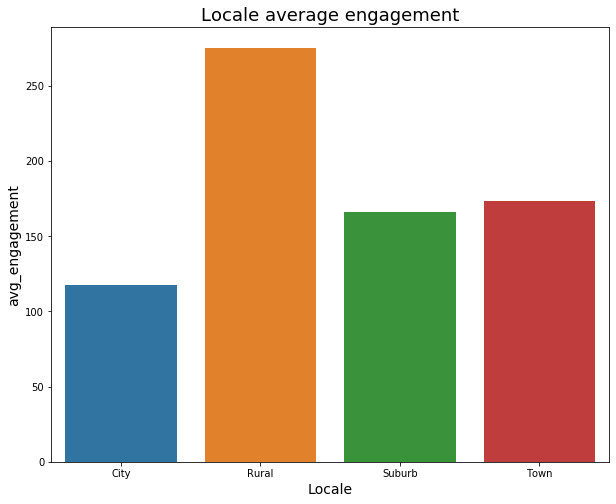

In [358]:
plt.figure(figsize=(10,8))
sns.barplot(x=avg['locale'], y=avg['avg_engagement'])
plt.xlabel('Locale', fontsize=14)
plt.ylabel('avg_engagement', fontsize=14)
plt.title('Locale average engagement', fontsize=18)
plt.show()

In [359]:
month = pd.to_datetime(de['time']).dt.month_name()

In [360]:
de['month']=month

In [379]:
time = de.groupby('month')['engagement_index'].mean().reset_index(name='avg_engagement')
time

,month,avg_engagement
0,April,203.635251
1,August,119.633864
2,December,191.255013
3,February,154.539105
4,January,107.032540
5,July,39.134103
6,June,97.503382
7,March,190.751239
8,May,166.453779
9,November,186.514109


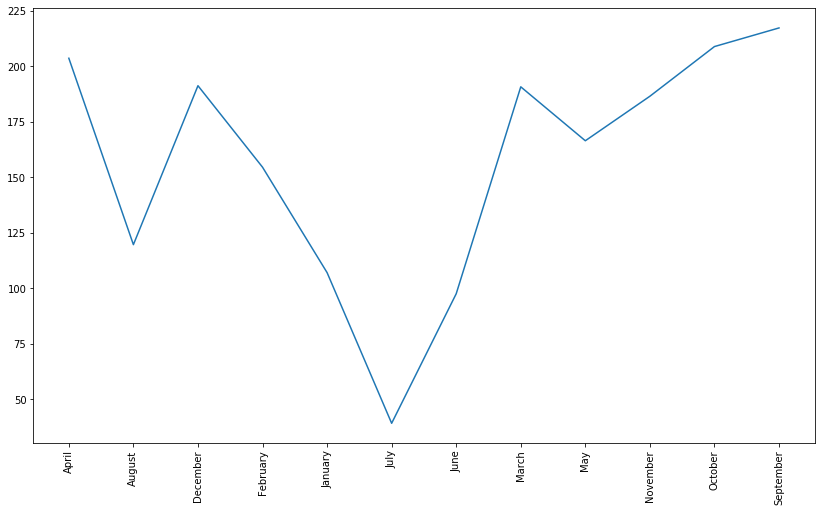

In [383]:
plt.figure(figsize=(14,8))
plt.plot(time['month'], time['avg_engagement'])
plt.xticks(rotation=90)
plt.show()